# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Monday, October 21, 2024, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a Neural Network (MLP). This is similar to a problem you have worked on before but requires the use of a neural network model.

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  



> Good luck, comrade!

---


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# For network architecture visualization, other options are totally fine
from tensorflow.keras.utils import plot_model
from torchviz import make_dot
from sklearn.model_selection import train_test_split
#Flere nødvendige biblioteker importert
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from keras import ops
import keras
import tensorflow as tf
import random


# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a neural network (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering. So the manual feature engineering is not allowed!
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Enhance performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning training hyperparameters.

> Note: There are no restrictions on the tricks you can use — just achieve the required accuracy. Stack more layers, use AdamW, scheduling, ect. Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How did you achieve the reproducibility of the results?

   I achived the reproducibility of the results by using seeds: (np.random.seed(42) | random.seed(42) | tf.random.set_seed(42)).
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.

   I chose SGD optimizer. I chose SGD since this is the optimizer we focused on during the lectures and since I'm working in a group with other colleagues, we wanted to try different solutions with different optimizers. The difference between SGD and Adam optimizer is that Adam optimizer derives in the "adaptive moment estimation". This means that is calculates the learning rate for the neural network individually. Whereas SGD uses the same learning rate throughout the whole network. 

   - Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?

   The third subplot shows the learning rate over epochs, which remains constant because you're using SGD. This means the learning rate doesn't change automatically during training.
   In this case, learning rate scheduling didn't come into play since SGD uses a fixed learning rate. This steady rate might limit the model's ability to explore different solutions effectively. It could impact how well it converges to the best outcome.

   - Conduct an ablation study of each architectural and optimization choice concerning test accuracy.

   Chose to use the manual learning rate schedular with warmup and cosine decay for this exact task, since it is possible to solve without this. These help with improving stability and convergence of the model. Therefore, below the plot of my neural network, I have provided with the manual learning rate schedular with warmup and cosine decay. When doing the ablation study, we can see that the adam optimzer works better. To see this, see the plot for both adam and SGD whereas Adam scores higher with the manual learning rate schedule and cosine decay. Even with other parameter tunings, the one that sticks out was which layer I did the activation and what activation I used. 

In [14]:
datas = pd.read_csv('nn_data.csv')
trainer = datas[datas['split'] == 'train']
tester = datas[datas['split'] == 'test']

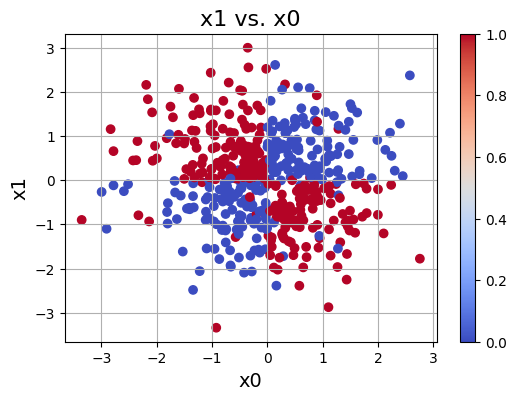

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(trainer['x0'], trainer['x1'], c=trainer['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 12)             │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205 (820.00 B)

 Trainable params: 205 (820.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6132 - loss: 0.6903 - val_binary_accuracy: 0.6500 - val_loss: 0.6978
Epoch 2/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - binary_accuracy: 0.6146 - loss: 0.6763 - val_binary_accuracy: 0.6400 - val_loss: 0.6865
Epoch 3/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - binary_accuracy: 0.6228 - loss: 0.6648 - val_binary_accuracy: 0.6500 - val_loss: 0.6769
Epoch 4/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - binary_accuracy: 0.6148 - loss: 0.6550 - val_binary_accuracy: 0.6400 - val_loss: 0.6684
Epoch 5/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - binary_accuracy: 0.6256 - loss: 0.6464 - val_binary_accuracy: 0.6400 - val_loss: 0.6608
Epoch 6/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - binary_accuracy: 0.6556 - loss: 0.6388 - val_binary_accuracy: 0.6500 - val_loss: 0.6540
Epoch 7/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - binary_accuracy: 0.6806 - loss: 0.6320 - val_binary_accuracy: 0.6700 - val_loss: 0.6474
E

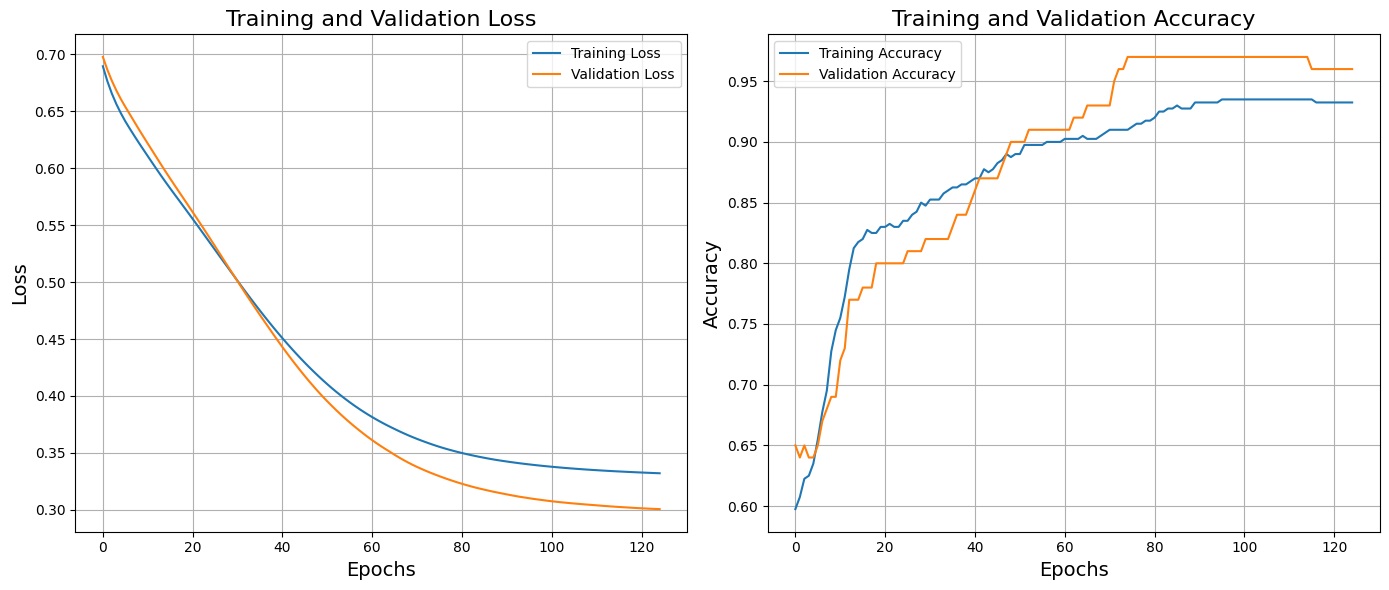

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - binary_accuracy: 0.9207 - loss: 0.3591
Test Accuracy: 0.9300
Test loss: 0.3342


In [16]:
#Setter seed for å få reprouduserbare verdier
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

#Laster inn data fra csv fil
data = pd.read_csv("nn_data.csv")
train = data[data["split"] == "train"]
test = data[data["split"] == "test"]

#Splitter dataen i trening og testsett, deretter bruker jeg train_test_split for å få et valideringssett.
X_train = train[["x0", "x1"]].values
y_train = train["y"].values

X_test = test[["x0","x1"]].values
y_test = test["y"].values

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) #Fått valideringssett, og dataen er sortert. Kan nå gå videre til å danne det nevrale nettverket.

#Vil tenke ut hvordan det nevrale nettverket skal være, ut i fra datasettet.
#Datasettet består av 1000 verdier totalt, der 500 er train og 500 er test. vi har features x0 og x1 og target i y.

model = keras.Sequential()

model.add(keras.Input(shape = (2,))) #Input layer, vi har kun 2 features
model.add(keras.layers.Dense(12, activation = "relu")) #Hidden layer med et bestemt antall noder og aktiviseringsfunksjon. Velger relu siden den funker bra på de skjulte lagene. 
model.add(keras.layers.Dense(12, activation = "relu")) #--||--, velger 11 siden det kan gi en god trening uten å forårsake overfitting.
model.add(keras.layers.Dense(1, activation = "sigmoid")) #Output layer, siden vi har en binær klassifisering, velger vi sigmoid som aktiviseringsfunksjon.

#Bygge modellen, hvorfor? Kompilerer med optimizer, loss og metrics for å finne ut hva valideringsmetrikken blir til slutt (accuracy)
model.compile(
    optimizer = keras.optimizers.SGD(), 
    loss = keras.losses.BinaryCrossentropy(), #Siden targetverdien er mellom 0 og 1, så bruker jeg Binary Cross entropy
    metrics = [keras.metrics.BinaryAccuracy()],
)

model.summary()

#Trene modellen
history = model.fit(X_train, y_train, epochs=125, batch_size = 16, validation_data=(X_val, y_val))

#Danner et subplot for accuracy og loss for å se utviklingen underveis for å forstå hvordan vi burde endre hyperparamterene for å forbedre prediksjonen (Backpropagation)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Plotter loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('Loss', fontsize=14)
ax1.set_title('Training and Validation Loss', fontsize=16)
ax1.legend()
ax1.grid(True)

#Plotter accuracy
ax2.plot(history.history['binary_accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('Accuracy', fontsize=14)
ax2.set_title('Training and Validation Accuracy', fontsize=16)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


#Kjører nå med hensyn på test data for å se hva Accuracy er
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")



#Viktig å ta med seg: Ved bruk av SGD vil man få forskjellige verdier i et datasett. Man kan få en test accuracy først over og deretter under. 
#Dette er fordi SGD er at man tar tilfeldige verdier fra batchen for hver oppdatering. Deretter beregner SGD farten og vekten ut ifra verdiene. 
#Ved å monitorere ved bruk av seed = 42 vil vi kunne reprodusere samme resultat hver gang, slik at vi kan analysere det nevrale nettverket bedre. 

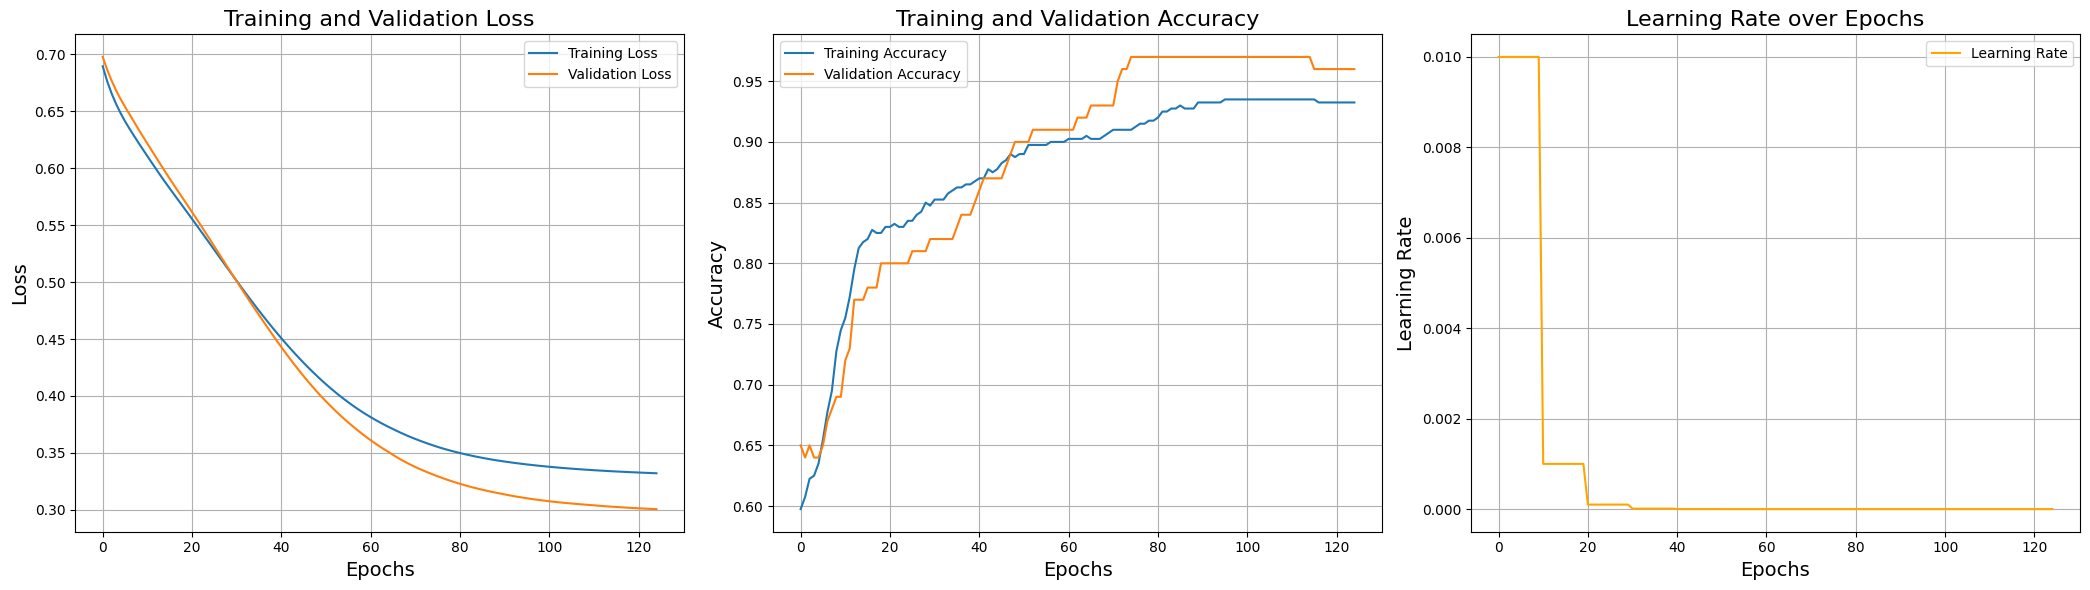

In [27]:
# Define a learning rate schedule
initial_lr = 0.01
def lr_schedule(epoch):
    return initial_lr * (0.1 ** (epoch // 10))  # Decrease the learning rate every 10 epochs

# Learning Rate Scheduler callback
lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule, verbose=1)

# Compile the model
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=initial_lr), 
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

# Create subplots for loss, accuracy, and learning rate
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 6))

# Plot loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('Loss', fontsize=14)
ax1.set_title('Training and Validation Loss', fontsize=16)
ax1.legend()
ax1.grid(True)

# Plot accuracy
ax2.plot(history.history['binary_accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('Accuracy', fontsize=14)
ax2.set_title('Training and Validation Accuracy', fontsize=16)
ax2.legend()
ax2.grid(True)

# Plot learning rate
# Extract the learning rate for each epoch from the history
lrs = [initial_lr * (0.1 ** (epoch // 10)) for epoch in range(125)]
ax3.plot(lrs, label='Learning Rate', color='orange')
ax3.set_xlabel('Epochs', fontsize=14)
ax3.set_ylabel('Learning Rate', fontsize=14)
ax3.set_title('Learning Rate over Epochs', fontsize=16)
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()




In [22]:
# Function to create a new model instance
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(2,)),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Initial learning rate
initial_lr = 0.01

# Define the learning rate schedule with warmup and cosine decay
def lr_schedule_sgd(epoch, lr):
    warmup_epochs = 10
    if epoch < warmup_epochs:
        return initial_lr * (epoch + 1) / warmup_epochs
    else:
        return initial_lr * 0.5 * (1 + np.cos(np.pi * (epoch - warmup_epochs) / (125 - warmup_epochs)))

def lr_schedule_adam(epoch, lr):
    warmup_epochs = 5
    if epoch < warmup_epochs:
        return initial_lr * (epoch + 1) / warmup_epochs
    else:
        return initial_lr * 0.5 * (1 + np.cos(np.pi * (epoch - warmup_epochs) / (125 - warmup_epochs)))

# Learning Rate Scheduler callbacks
lr_scheduler_sgd = keras.callbacks.LearningRateScheduler(lr_schedule_sgd, verbose=1)
lr_scheduler_adam = keras.callbacks.LearningRateScheduler(lr_schedule_adam, verbose=1)

# Compile and train the model with SGD optimizer
model = create_model()

model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=initial_lr), 
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

history_sgd = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=125,
    callbacks=[lr_scheduler_sgd]
)

# Compile and train the model with Adam optimizer
model1 = create_model()
model1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=initial_lr), 
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
)

history_adam = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=125,
    callbacks=[lr_scheduler_adam]
)

test_loss_adam, test_accuracy_adam = model1.evaluate(X_test, y_test)
test_loss_sgd, test_accuracy_sgd = model.evaluate(X_test, y_test)



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/125
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.4775 - loss: 0.7297 - val_binary_accuracy: 0.4100 - val_loss: 0.7325 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.002.
Epoch 2/125
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.4756 - loss: 0.7289 - val_binary_accuracy: 0.4100 - val_loss: 0.7310 - learning_rate: 0.0020

Epoch 3: LearningRateScheduler setting learning rate to 0.003.
Epoch 3/125
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.4756 - loss: 0.7272 - val_binary_accuracy: 0.4100 - val_loss: 0.7288 - learning_rate: 0.0030

Epoch 4: LearningRateScheduler setting learning rate to 0.004.
Epoch 4/125
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.4756 - loss: 0.7250 - val_binary_accuracy: 0.4000 - val_loss: 0.7259 - learning_rate: 0.0040

Epoch 5: LearningRateScheduler setting learning rate to 0.005.
Epoch 5/125
13/13 ━━

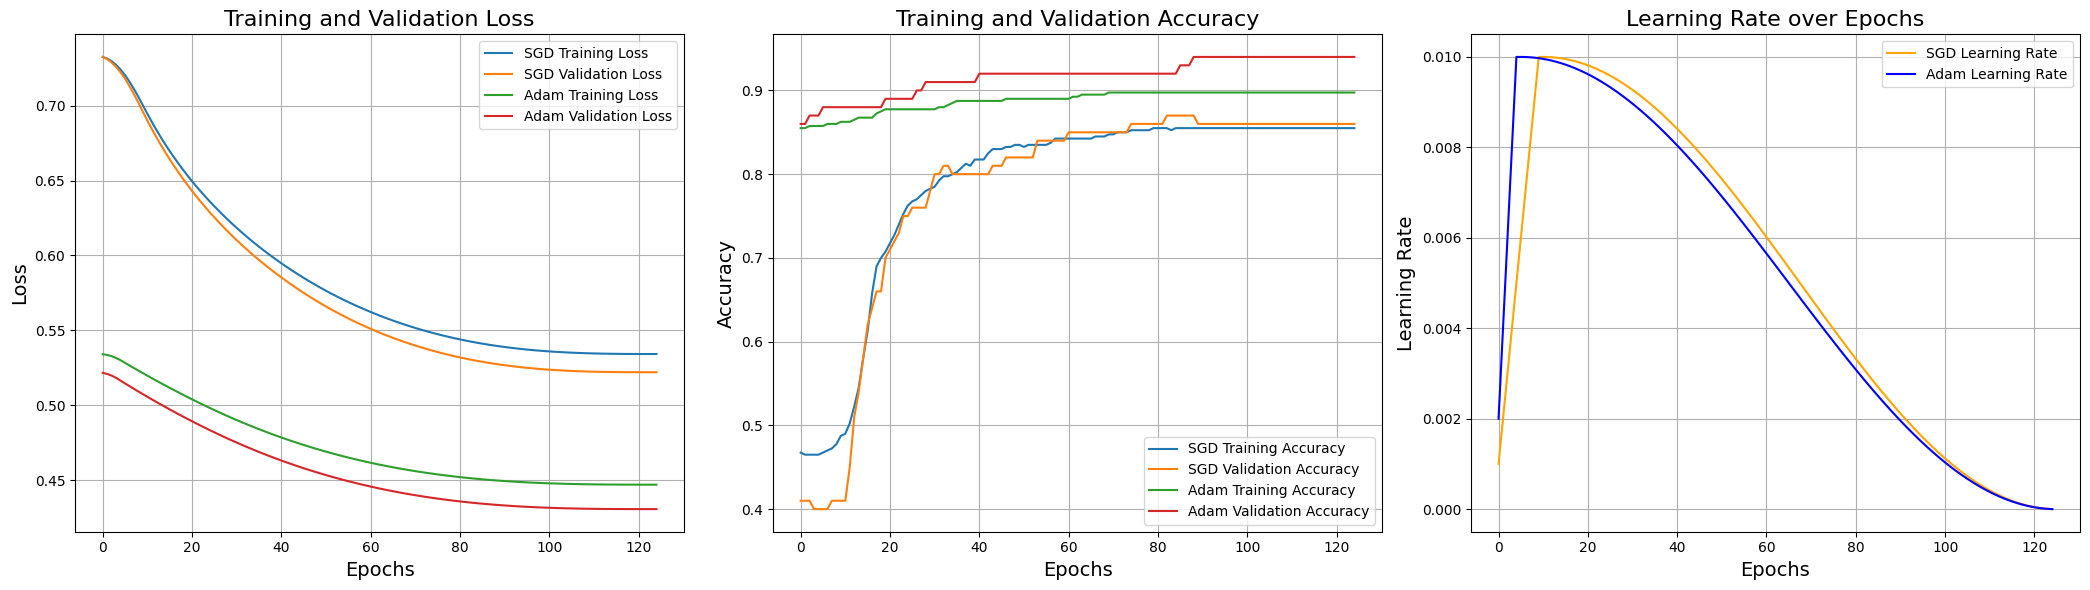

In [23]:
# Create subplots for loss, accuracy, and learning rate
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 6))

# Plot loss
ax1.plot(history_sgd.history['loss'], label='SGD Training Loss')
ax1.plot(history_sgd.history['val_loss'], label='SGD Validation Loss')
ax1.plot(history_adam.history['loss'], label='Adam Training Loss')
ax1.plot(history_adam.history['val_loss'], label='Adam Validation Loss')
ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('Loss', fontsize=14)
ax1.set_title('Training and Validation Loss', fontsize=16)
ax1.legend()
ax1.grid(True)

# Plot accuracy
ax2.plot(history_sgd.history['binary_accuracy'], label='SGD Training Accuracy')
ax2.plot(history_sgd.history['val_binary_accuracy'], label='SGD Validation Accuracy')
ax2.plot(history_adam.history['binary_accuracy'], label='Adam Training Accuracy')
ax2.plot(history_adam.history['val_binary_accuracy'], label='Adam Validation Accuracy')
ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('Accuracy', fontsize=14)
ax2.set_title('Training and Validation Accuracy', fontsize=16)
ax2.legend()
ax2.grid(True)

# Plot learning rate
lrs_sgd = [lr_schedule_sgd(epoch, initial_lr) for epoch in range(125)]
lrs_adam = [lr_schedule_adam(epoch, initial_lr) for epoch in range(125)]
ax3.plot(lrs_sgd, label='SGD Learning Rate', color='orange')
ax3.plot(lrs_adam, label='Adam Learning Rate', color='blue')
ax3.set_xlabel('Epochs', fontsize=14)
ax3.set_ylabel('Learning Rate', fontsize=14)
ax3.set_title('Learning Rate over Epochs', fontsize=16)
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()


# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts (~30 days * 50 submissions = 1500 total attempts per student).

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:

 - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.

For the task I used PCA, UMAP, t-SNE to complete the task. I also used t-SNE for some objectives, however the solution is based on UMAP. A reason for PCA to have a better score (from Kaggle) than t-SNE is that PCA is quicker and is not as computation heavy as t-SNE, since t-SNE have to adjust itself to a lot of probability distributions. PCA takes the main features and focuses on the variance of the data, whereas t-SNE minimices the divergence between the probability distributions of the data. However, the best method for this task were UMAP. This is because it can handle non-linear datasets. This is vital for PCA, although not for t-SNE, but UMAP did get the best result. UMAP is a tool that reduces complex, high-dimensional data into two or three dimensions so we can visualize it more easily. It groups similar data points close together while keeping different points apart.

   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   
The clustering algorithms I used were kmeans and DBSCAN. kmeans splits the dataset of n datapoints into k clusters. Each datapoint is added to the cluster if the centroid centrium is the nearest datapoint. It uses an algorithm to do so. The algorithm is to choose a number k, that represents n clusters. Choose k random centroids, assign a datapoint to a random cluster. Then calculate the euclidean distance for each datapoint and the centroids. Assign the nearest, choose new centroids and calculate the mean. Repeat until it does not change anymore. However DBSCAN focuses on identifying three types of points in the data. points near the centroid of a cluster, points inside the cluster, but towards the edge, and outliers. It uses $\epsilon$ to denote the max distance between to ponits that is in the same clusters. The reason for using DBSCAN was that first of all it gave me a better score. The reason for that DBSCAN may have given the best result on the code I have written is that kmeans struggle with outliers and force them into a cluster where it may not supposed to be. 

   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   
From searching in maps for the locations I found, I found that I only had one location. This is where the server was based on (Latitude, Longitude) at (63.45, 10.45). I deduced the location by looking at the clusters and their centroid.

   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more 
   effective?
   
The hidden data type in the dataset were categorical data. Categorical data is data that focuses on groups, rather than numbers. Such as regions for this case. The issue with categorical data is that is not easy to cluster. Since all is the same category, we have to seperate them with using numerical data. For PCA, that needs linear dimensionality, it cannot solve the non-linear relationships. However this can t-SNE and UMAP.     
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

Did not do the optional task

In [32]:
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)

In [33]:
data

,ID,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [34]:
# The dataset is heavy. Applying clustering directly on the dataset is not feasible, I guess. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


In [ ]:
#Now we have a large datafile, with a lot of columns. We can't use all of them, so we need to reduce the dimensionality of the data. Want to use T-sne to reduce the dimensionality of the data.
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

tsne = TSNE(n_components = 2, random_state = 42, learning_rate='auto', init='random', perplexity=3)
data_tsne = tsne.fit_transform(data.iloc[:, 1:])

pca = PCA(n_components = 2, random_state = 42, svd_solver='full')
data_pca = pca.fit_transform(data.iloc[:, 1:])

# Create subplots for the t-SNE and PCA results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot t-SNE
ax1.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data[0], cmap='coolwarm')
ax1.set_xlabel('t-SNE 1', fontsize=14)
ax1.set_ylabel('t-SNE 2', fontsize=14)
ax1.set_title('t-SNE', fontsize=16)
ax1.grid(True)
 
# Plot PCA
ax2.scatter(data_pca[:, 0], data_pca[:, 1], c=data[0], cmap='coolwarm')
ax2.set_xlabel('PCA 1', fontsize=14)
ax2.set_ylabel('PCA 2', fontsize=14)
ax2.set_title('PCA', fontsize=16)
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#As we can see, the t-SNE plot is much better than the PCA plot. We can see that the data is separated into different clusters. PCA often is better for a linear relationship, therefore 
#I would choose t-SNE for this dataset from this representation, however it may change due to other factors. I will therefore analyze different scores to see which one is better.

#Now we can use the t-SNE data to apply clustering algorithms. I will use K-means clustering for this dataset.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit_predict(data_tsne)

#Predict the silhouette score
silhouette_scores = silhouette_score(data_tsne, kmeans.labels_)
print(f'Silhuette score: {silhouette_scores:.4f}')
#Predict the inertia score, the lower the better
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.4f}')

#Predict the Calinski-Harabasz score, the higher the better
calinski_harabasz = calinski_harabasz_score(data_tsne, kmeans.labels_)
print(f'Calinski-Harabasz: {calinski_harabasz:.4f}')

#Predict the clusters for the test data
y_pred = kmeans.predict(data_tsne)

#Now we can visualize the clusters, just to have a visual representation of what I will be working with and understand the clustering better. 
plt.figure(figsize=(6, 4))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans.labels_, cmap='coolwarm')
plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.title('t-SNE Clusters', fontsize=16)
plt.colorbar()
plt.grid(True)
plt.show()


In [ ]:
#From the scores, we can see that we have to improve the clustering, maybe by changing the number of clusters.
#The silhouette score is not close to 1, which means that the clusters are not well separated.
#The inertia score is quite high, which means that the clusters are not compact.
#The Calinski-Harabasz score is quite low, which means that the clusters are not well separated.

#Since it is very low with just 3 clusters, and from the plot before we can see that 3 clusters is way too low, we can try to increase the number of clusters to see if we can improve the clustering.

#We can try to change the number of clusters to see if we can improve the clustering.
kmeans = KMeans(n_clusters=1700, random_state=42, init='k-means++')
kmeans.fit_predict(data_tsne)

#Predict the silhouette score
silhouette_scores = silhouette_score(data_tsne, kmeans.labels_)
print(f'Silhuette score: {silhouette_scores:.4f}')

#Predict the inertia score, the lower the better
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.4f}')

#Predict the Calinski-Harabasz score, the higher the better
calinski_harabasz = calinski_harabasz_score(data_tsne, kmeans.labels_)
print(f'Calinski-Harabasz: {calinski_harabasz:.4f}')

#Predict the clusters for the test data
y_pred = kmeans.predict(data_tsne)

#Analyze the result 
result_tsne = pd.DataFrame({'ID': data.iloc[:len(data_tsne)].index, 'cluster': y_pred})   
result_tsne.to_csv('clusters_tsne.csv')

result_tsne.head()


In [ ]:
#Will now do the same as before, although for the PCA data

#Predict the clusters for the PCA data
kmeans = KMeans(n_clusters=2200, random_state=42, init='k-means++') 
kmeans.fit_predict(data_pca)

#Predict the silhouette score
silhouette_scores = silhouette_score(data_pca, kmeans.labels_)
print(f'Silhuette score: {silhouette_scores:.4f}')

#Predict the inertia score, the lower the better
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.4f}')

#Predict the Calinski-Harabasz score, the higher the better
calinski_harabasz = calinski_harabasz_score(data_pca, kmeans.labels_)
print(f'Calinski-Harabasz: {calinski_harabasz:.4f}')

#Predict the clusters for the test data
y_pred = kmeans.predict(data_pca)

#Analyze the result 
result_pca = pd.DataFrame({'ID': data.iloc[:len(data_pca)].index, 'cluster': y_pred})   
result_pca.to_csv('clusters_pca.csv')

result_pca.head()


In [ ]:
#From my submission to Kaggle, I saw that the PCA was better than t-sne. I would therefore choose PCA. However, i want 4000 rows and a header, and I have to add some clustering methods to the data.
#I want to use DBSCAN for this dataset, since it is a density-based clustering algorithm.
from sklearn.cluster import DBSCAN

#Reshaping the pca data to fit the DBSCAN algorithm since it requires a 2D array
d = data_pca.shape[1] - 1
e = data_pca.shape[1]    

dbscan = DBSCAN(eps=0.66, min_samples = 2*e, metric='euclidean')
data['cluster'] = dbscan.fit_predict(data_pca)

#Predict the silhouette score
silhouette_scores = silhouette_score(data_pca, data['cluster'])
print(f'Silhuette score: {silhouette_scores:.4f}')

#Predict the Calinski-Harabasz score, the higher the better
calinski_harabasz = calinski_harabasz_score(data_pca, data['cluster'])
print(f'Calinski-Harabasz: {calinski_harabasz:.4f}')

#Predict the clusters for the test data
y_pred = dbscan.fit_predict(data_pca)

#Analyze the result
result_dbscan = pd.DataFrame({'ID': data.iloc[:len(data_pca)].index, 'cluster': y_pred})
result_dbscan.to_csv('clusters_dbscan.csv')

result_dbscan.head()

In [ ]:
# Reshaping the tsne data to fit the DBSCAN algorithm since it requires a 2D array
dt = data_tsne.shape[1] - 1
et = data_tsne.shape[1]

dbscan = DBSCAN(eps=5.7, min_samples = 2*et, metric='euclidean')
dbscan.fit_predict(data_tsne)

#Predict the silhouette score
silhouette_scores = silhouette_score(data_tsne, kmeans.labels_)
print(f'Silhuette score: {silhouette_scores:.4f}')

#Predict the Calinski-Harabasz score, the higher the better
calinski_harabasz = calinski_harabasz_score(data_tsne, kmeans.labels_)
print(f'Calinski-Harabasz: {calinski_harabasz:.4f}')

#Predict the clusters for the test data
y_pred = dbscan.fit_predict(data_tsne)

#Analyze the result
result_dbscan = pd.DataFrame({'ID': data.iloc[:len(data_tsne)].index, 'cluster': y_pred})
result_dbscan.to_csv('clusters_dbscan.csv')

result_dbscan.head()

In [ ]:
#Using UMAP to see if we can improve the clustering
import umap

#Need to know what the optimal number of neighbors is, so I will try different values to see which one is the best.
neighbors = [5, 10, 15, 20, 25]

for n in neighbors:
    umap_model = umap.UMAP(n_components=2,n_neighbors=n, random_state=42)
    data_umap = umap_model.fit_transform(data.iloc[:, 1:])

    plt.figure(figsize=(6, 4))
    plt.scatter(data_umap[:, 0], data_umap[:, 1], c=data[0], cmap='coolwarm')
    plt.xlabel('UMAP 1', fontsize=14)
    plt.ylabel('UMAP 2', fontsize=14)
    plt.title(f'UMAP with {n} neighbors', fontsize=16)
    plt.colorbar()
    plt.grid(True)
    plt.show()
    

In [ ]:
#Can now solve this using n_neighbors = 20 since it is the best one. Will use dimensionality reduction to reduce the data to 2D and then apply clustering algorithms.

umap_model = umap.UMAP(n_components=2, n_neighbors=20, random_state=42)
data_umap = umap_model.fit_transform(data.iloc[:, 1:])

plt.figure(figsize=(6, 4))
plt.scatter(data_umap[:, 0], data_umap[:, 1], c=data.iloc[:,13021], cmap='coolwarm', s=5)
plt.xlabel('UMAP 1', fontsize=14)
plt.ylabel('UMAP 2', fontsize=14)
plt.title('UMAP', fontsize=16)
plt.colorbar()
plt.grid(True)
plt.show()


In [ ]:
#Now we want to reduce UMAP data to 2D and apply clustering algorithms. I will use DBSCAN for this dataset, since it is a density-based clustering algorithm.


#Reshaping the umap data to fit the DBSCAN algorithm since it requires a 2D array
data_shaped_after_dimension = data_umap.shape[1]

dbscan = DBSCAN(eps=3, min_samples = 2*data_shaped_after_dimension, metric='euclidean')
dbscan.fit(data_umap)

#Predict the clusters for the test data
y_pred = dbscan.fit_predict(data_umap)

#Estimate the number of clusters
n_clusters = len(np.unique(y_pred)) - (1 if -1 in y_pred else 0)
print(f'Number of clusters: {n_clusters}')


#Analyze the result
result_umap = pd.DataFrame({'ID': data.iloc[:len(data_umap)].index, 'cluster': y_pred})
result_umap.to_csv('clusters_umap.csv')

result_umap.head()

In [ ]:
#Now we want to use cluster_umap.csv to find the cluster centers, and from that to find the geographical location of the servers.
#Now we need to find each cluster center for each cluster. 
#Read the data
data_clusters = pd.read_csv('clusters_umap.csv')

#Add a list for the centroids to store the values
centroid_list = []
unique_cluster_ids = data_clusters['cluster'].unique()

#Iterate through the unique cluster IDs
for cluster in unique_cluster_ids:
    if cluster != -1: 
        points_of_cluster = data_clusters[data_clusters['cluster'] == cluster]
        centroid = points_of_cluster.mean(axis=0)
        centroid_list.append(centroid)

print("Calculated Cluster Centroids:")
print(centroid_list)


def convert_centroid_to_geo(centroid):
    #These are the ranges for the geographical coordinates in Trondheim
    lat_bounds = (63.38, 63.45)
    lon_bounds = (10.35, 10.45)
    
    #Normalize the centroid values to the range [0, 1]
    lat_normalized = (centroid[0] - centroid.min()) / (centroid.max() - centroid.min())
    lon_normalized = (centroid[1] - centroid.min()) / (centroid.max() - centroid.min())
    
    #Scale the normalized values to the geographic coordinates
    lat_geo = lat_bounds[0] + lat_normalized * (lat_bounds[1] - lat_bounds[0])
    lon_geo = lon_bounds[0] + lon_normalized * (lon_bounds[1] - lon_bounds[0])
    
    return lat_geo, lon_geo

geo_coordinates = [convert_centroid_to_geo(center) for center in centroid_list]

#The servers are located in these geographical coordinates
print("\nGeographical Coordinates:")
for idx, (latitude, longitude) in enumerate(geo_coordinates):
    print(f'Cluster {idx}: Latitude = {latitude:.4f}, Longitude = {longitude:.4f}')




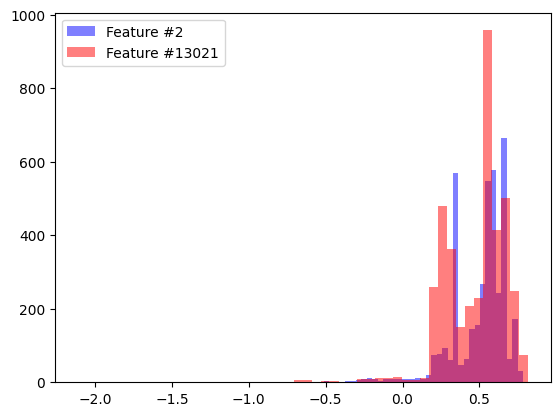

In [35]:
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()

In [36]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,2
1,1,6
2,2,3
3,3,3
4,4,8
...,...,...
3995,3995,3
3996,3996,7
3997,3997,3
3998,3998,7



---

## 🎯 Note: Clustering Accuracy Evaluation


The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation focuses solely on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [56]:
from typing import Any
import numpy as np
import sklearn.metrics
import scipy.optimize

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy


In [57]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

1.0

In [65]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.3333333333333333

In [67]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.5

In [1]:
steadyStateProbabilities = [0.0434782, 0.0512421, 0.0603925, 0.0711769, 0.083887, 0.0988669, 0.116522]

# Average number of passengers at the bus stop
averagePassengers = sum(k * steadyStateProbabilities[k] for k in range(len(steadyStateProbabilities)))
averagePassengers


1.9145723